### Objective

1. Predict the percentage of an student based on the no. of study hours
2. What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading and Importing the data 
Data can be found at http://bit.ly/w-data

In [8]:
student_scores_df =  pd.read_csv("http://bit.ly/w-data")

In [9]:
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


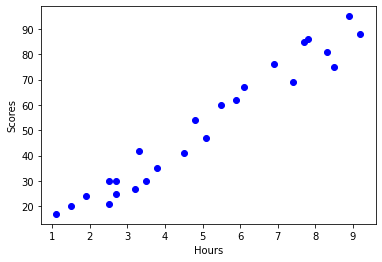

In [11]:
plt.scatter(student_scores_df.Hours, student_scores_df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using **np.random.rand()** function: 

In [15]:
msk = np.random.rand(len(student_scores_df))<0.8
print(msk)
train = student_scores_df[msk]
test = student_scores_df[~msk]

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.



### Train data distribution
a scatter using train dataset

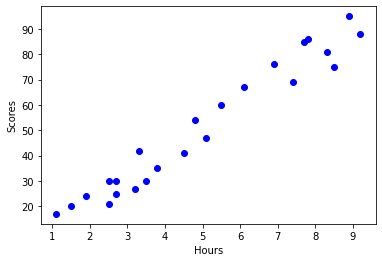

In [16]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Modelling
Using the Sklearn Package to model the data 

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.76462665]]
Intercept:  [2.46264906]


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.  We can plot the regression line on the training dataset.

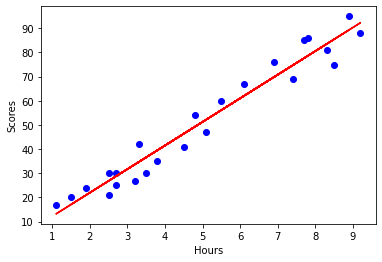

In [32]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Evaluation
we can compare the actual values to evaluated values to calculate the accuracy of the model. (R-sqared is a metric to understand how close the fits to a model, the higher the R-squared the better the model fits to your data.


In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y2 = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2 - test_y) ** 2))


Mean absolute error: 1.93
Residual sum of squares (MSE): 3.71


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [37]:
hours = [[9.25]]
score925 = regr.predict(hours)
print("Predicted Score = {}".format(score925[0]))

Predicted Score = [92.78544562]
